In [18]:
# Import the libraries

from flask import Flask, request
from tensorflow import keras
from keras.models import Sequential
from keras.models import model_from_json, load_model
from werkzeug.utils import secure_filename
from uuid import uuid4
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt


In [19]:
# Constants 

folder_path = os.path.join('test')
emo_labels = ['angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral']
num_class = len(emo_labels)
img_size = 48


In [20]:
# Set path

cascade_path = os.path.join(folder_path, 'haarcascade_frontalface_alt.xml')
model_path = os.path.join(folder_path, 'model.h5')
model_weight_path = os.path.join(folder_path, 'model_weight.h5')


In [21]:
# Load file

cascade = cv2.CascadeClassifier(cascade_path) 

model: Sequential = load_model(model_path)
model.load_weights(model_weight_path)   

In [22]:
# Get expression
def getExpression(frame_gray, faceRects):
    results = []
    if len(faceRects) > 0:
        for faceRect in faceRects:
            x, y, w, h = faceRect
            images = []
            rs_sum = np.array([0.0] * num_class)
            image = frame_gray[y: y + h, x: x + w] 
            image = cv2.resize(image, (img_size, img_size))
            image = image * (1. / 255)
            display = image.astype('float32')
            images.append(image) 
            images.append(cv2.flip(image, 1))
            images.append(cv2.resize(image[2:45, :], (img_size, img_size)))
            for img in images:
                image = img.reshape(1, img_size, img_size, 1)
                list_of_list = model.predict(image, batch_size=32, verbose=0)  # predict
                result = [prob for lst in list_of_list for prob in lst]
                rs_sum += np.array(result)
            
            probs = rs_sum / len(images)
            label = np.argmax(probs)
            emo = emo_labels[label]
            results.append({
                'x': int(x),
                'y': int(y),
                'w': int(w),
                'h': int(h),
                'expression': emo,
                'label_probs': {emo_labels[i]: prob for i, prob in enumerate(probs)}
            })
            
            # Display the image
            plt.imshow(display, cmap='gray')
            plt.title(f"Expression: {emo}")
            plt.show()

    # Print the results
    for result in results:
        print(f"Face at ({result['x']}, {result['y']}, {result['w']}, {result['h']}):")
        print(f"Expression: {result['expression']}")
        print("Label probabilities:")
        for label, prob in result['label_probs'].items():
            print(f"{label}: {prob}")
        print()

In [23]:
# Preprocess

def loading_face(image_name):
    image_path = os.path.join(folder_path,'images', image_name)
    frame = cv2.imread(image_path)

    frame_gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faceRects = cascade.detectMultiScale(frame_gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))
    return frame, frame_gray, faceRects

1.jpg


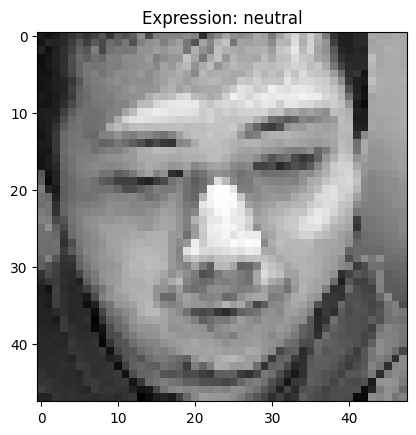

Face at (530, 498, 233, 233):
Expression: neutral
Label probabilities:
angry: 0.07523946029444535
disgust: 0.0014186382031766698
fear: 0.07772279841204484
happy: 0.008776180911809206
sad: 0.26165510217348736
surprise: 0.0031608859232316413
neutral: 0.5720268984635671

2.jpg


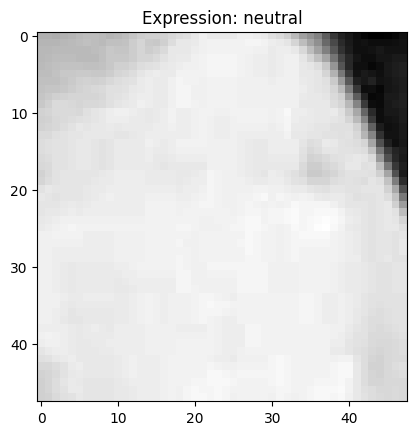

Face at (795, 731, 98, 98):
Expression: neutral
Label probabilities:
angry: 0.14293506741523743
disgust: 0.00183949441028138
fear: 0.1277202566464742
happy: 0.09860007216533025
sad: 0.08481662968794505
surprise: 0.241713876525561
neutral: 0.30237460136413574

3.jpg


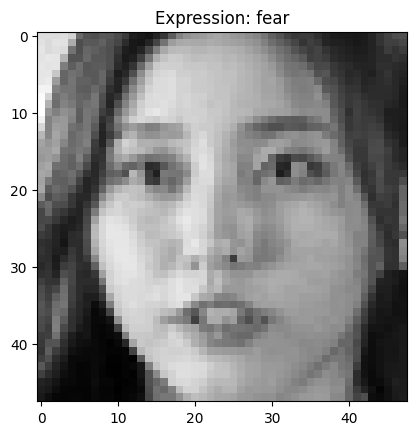

Face at (63, 30, 84, 84):
Expression: fear
Label probabilities:
angry: 0.030342261617382366
disgust: 0.004049607979444166
fear: 0.5340689917405447
happy: 0.02605819422751665
sad: 0.03156996642549833
surprise: 0.26124174396197003
neutral: 0.1126692568262418

4.jpg


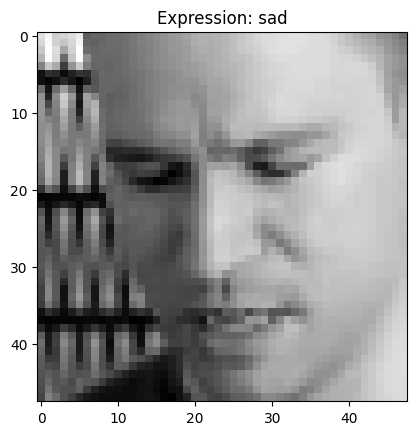

Face at (139, 111, 119, 119):
Expression: sad
Label probabilities:
angry: 0.12221252421538036
disgust: 0.024624863018592198
fear: 0.40940066675345105
happy: 0.0015833106299396604
sad: 0.4198192556699117
surprise: 6.194311208673753e-05
neutral: 0.022297412777940433

5.jpg


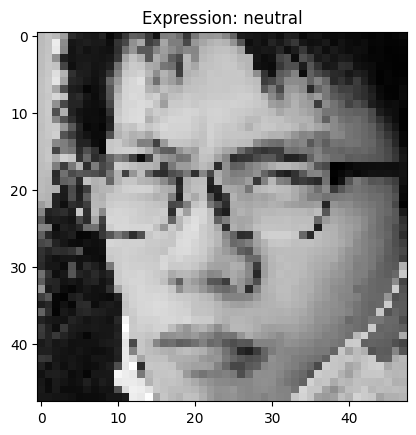

Face at (211, 291, 329, 329):
Expression: neutral
Label probabilities:
angry: 0.20669198036193848
disgust: 0.0076598164935906725
fear: 0.11937892685333888
happy: 0.00777145940810442
sad: 0.2940639853477478
surprise: 0.026211581736182172
neutral: 0.33822226027647656

6.jpg


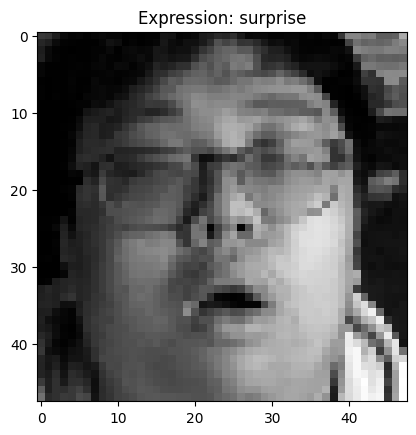

Face at (309, 507, 519, 519):
Expression: surprise
Label probabilities:
angry: 0.14950485030810037
disgust: 0.03544869894782702
fear: 0.1435091868042946
happy: 0.002496384782716632
sad: 0.1035229501624902
surprise: 0.5085556705792745
neutral: 0.05696223055322965

7.jpg


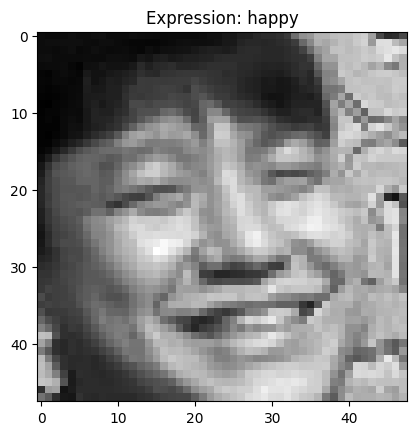

Face at (364, 363, 110, 110):
Expression: happy
Label probabilities:
angry: 0.0005372105758093918
disgust: 0.0008207367955037626
fear: 0.003286432668877145
happy: 0.9615916609764099
sad: 0.021696546813473105
surprise: 0.0019037682407846053
neutral: 0.010163728458185991

8.jpg


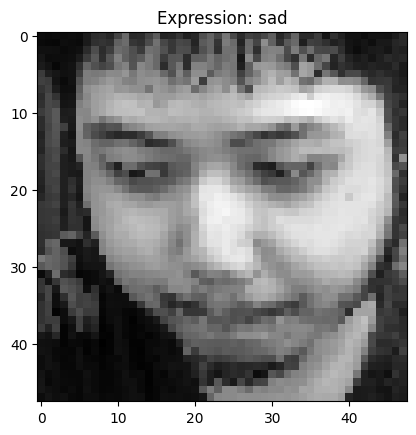

Face at (665, 563, 607, 607):
Expression: sad
Label probabilities:
angry: 0.05025699610511462
disgust: 0.0023927614674903452
fear: 0.3143485188484192
happy: 0.008957791607826948
sad: 0.5676089823246002
surprise: 0.0011763941050351907
neutral: 0.05525853422780832

9.jpg


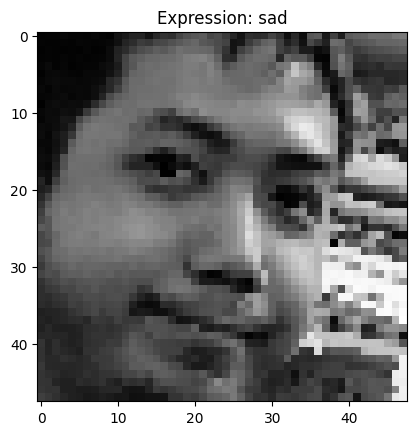

Face at (443, 649, 524, 524):
Expression: sad
Label probabilities:
angry: 0.04156475389997164
disgust: 0.001451019352922837
fear: 0.08213748193035524
happy: 0.31563010315100354
sad: 0.3672631134589513
surprise: 0.0013143504038453102
neutral: 0.19063918789227804

10.jpg


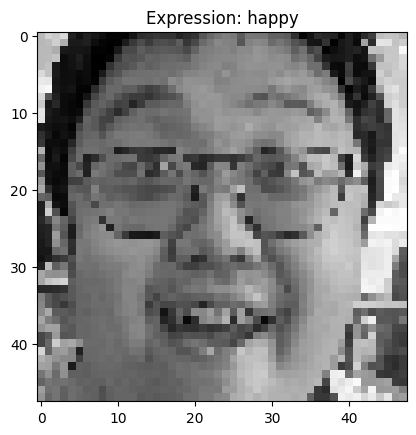

Face at (512, 253, 645, 645):
Expression: happy
Label probabilities:
angry: 0.032711612060666084
disgust: 0.002571335033280775
fear: 0.17402838418881098
happy: 0.42801838119824726
sad: 0.0063472533753762645
surprise: 0.3410637229681015
neutral: 0.015259316191077232



In [24]:
# Main

# loop image name to get expression
for i in range(0, 10):
    image_name = f"{i+1}.jpg"
    frame, frame_gray, faceRects = loading_face(image_name)
    print(image_name)
    getExpression(frame_gray, faceRects)
